<a href="https://colab.research.google.com/github/01PrathamS/PyTorch_Exercises/blob/main/Neural_Network_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch 
from torch import nn 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_moons

Make a binary classification dataset with Scikit-Learn's make_moons() function.
1. For consistency, the dataset should have 1000 samples and a random_state=42.
2. Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [42]:
X, y = make_moons(n_samples=1000, 
                  noise=0.03, 
                  random_state=42)  

X[:5], y[:5]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908]]),
 array([1, 1, 1, 1, 0]))

In [43]:
moons = pd.DataFrame({'X1': X[:, 0], 
                      'X2': X[:, 1], 
                      'label': y})
moons.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [44]:
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

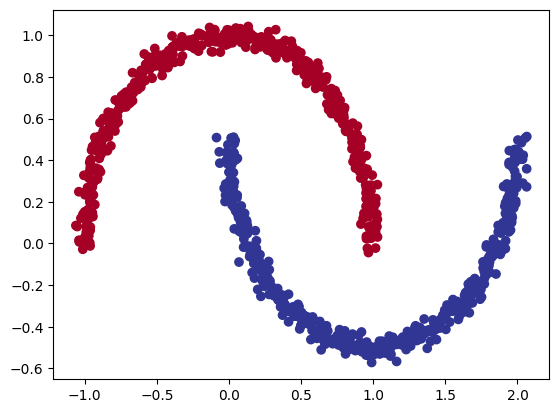

In [45]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            cmap = plt.cm.RdYlBu);

In [46]:
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float)

In [47]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
1. Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [48]:
class MakeMoons_V0(nn.Module):

  def __init__(self):
    super().__init__() 
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = MakeMoons_V0()
model_0

MakeMoons_V0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.01)

In [50]:

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [51]:
torch.manual_seed(42)

epochs = 1000 

for epoch in range(epochs):

  ## Forward Pass 
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, 
                    y_pred = y_pred)
  
  optimizer.zero_grad() 

  loss.backward() 

  optimizer.step() 

  model_0.eval() 

  with torch.inference_mode():

    test_logits = model_0(X_test).squeeze() 
    test_pred = torch.round(torch.sigmoid(test_logits)) 

    test_loss = loss_fn(test_logits, 
                        y_test) 
    
    test_acc = accuracy_fn(y_true=y_test, 
                           y_pred = test_pred)                     
    
  if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.63059, Accuracy: 63.62% | Test loss: 0.64190, Test acc: 56.00%
Epoch: 100 | Loss: 0.51634, Accuracy: 73.50% | Test loss: 0.53829, Test acc: 67.50%
Epoch: 200 | Loss: 0.45307, Accuracy: 76.38% | Test loss: 0.47964, Test acc: 70.00%
Epoch: 300 | Loss: 0.41364, Accuracy: 78.50% | Test loss: 0.44188, Test acc: 73.00%
Epoch: 400 | Loss: 0.38659, Accuracy: 80.00% | Test loss: 0.41492, Test acc: 74.50%
Epoch: 500 | Loss: 0.36644, Accuracy: 80.50% | Test loss: 0.39401, Test acc: 76.00%
Epoch: 600 | Loss: 0.35046, Accuracy: 81.50% | Test loss: 0.37680, Test acc: 77.50%
Epoch: 700 | Loss: 0.33718, Accuracy: 82.25% | Test loss: 0.36205, Test acc: 78.00%
Epoch: 800 | Loss: 0.32582, Accuracy: 82.38% | Test loss: 0.34911, Test acc: 78.50%
Epoch: 900 | Loss: 0.31589, Accuracy: 83.25% | Test loss: 0.33757, Test acc: 81.00%


5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [52]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


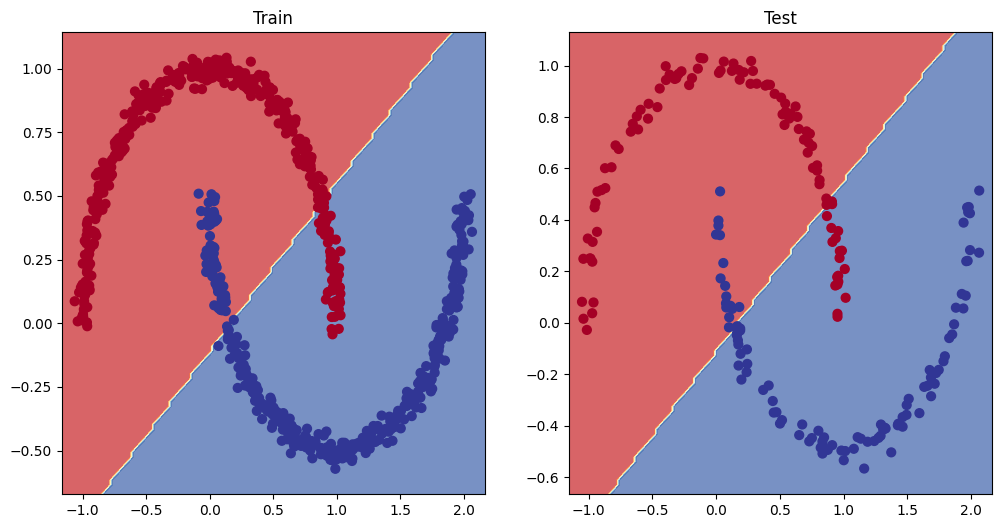

In [53]:
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1) 
plt.title('Train') 
plot_decision_boundary(model_0, X_train, y_train) 
plt.subplot(1, 2, 2) 
plt.title('Test') 
plot_decision_boundary(model_0,X_test, y_test)

6.Replicate the Tanh(hyperbolic tangent) activation function in pure PyTorch

## Improving Model Accuracy

In [54]:
class MakeMoons_V1(nn.Module):

  def __init__(self):
    super().__init__() 
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) 
    self.activation = nn.Tanh()

  def forward(self, x):
    return self.layer_3(self.activation(self.layer_2(self.activation(self.layer_1(x)))))

model_1 = MakeMoons_V1() 
model_1

MakeMoons_V1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (activation): Tanh()
)

In [55]:
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [56]:




torch.manual_seed(42) 

epochs = 1000 

for epoch in range(epochs):

  y_logits = model_1(X_train).squeeze() 
  y_pred = torch.round(torch.sigmoid(y_logits)) 

  loss = loss_fn(y_logits, y_train) 
  acc = accuracy_fn(y_true=y_train, 
                    y_pred = y_pred) 
  
  optimizer.zero_grad() 

  loss.backward() 

  optimizer.step() 

  model_1.eval() 
  with torch.inference_mode():
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) 

      test_loss = loss_fn(test_logits, y_test)                      
      test_acc = accuracy_fn(y_true=y_test, 
                             y_pred = test_pred)                     

  if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
   


Epoch: 0 | Loss: 0.71513, Accuracy: 30.63% | Test loss: 0.70451, Test acc: 34.50%
Epoch: 100 | Loss: 0.30251, Accuracy: 85.50% | Test loss: 0.31252, Test acc: 85.50%
Epoch: 200 | Loss: 0.24376, Accuracy: 89.25% | Test loss: 0.23887, Test acc: 90.50%
Epoch: 300 | Loss: 0.21197, Accuracy: 90.38% | Test loss: 0.20240, Test acc: 92.00%
Epoch: 400 | Loss: 0.15704, Accuracy: 93.88% | Test loss: 0.14712, Test acc: 93.50%
Epoch: 500 | Loss: 0.09760, Accuracy: 96.38% | Test loss: 0.09010, Test acc: 98.00%
Epoch: 600 | Loss: 0.05943, Accuracy: 98.88% | Test loss: 0.05415, Test acc: 99.00%
Epoch: 700 | Loss: 0.03915, Accuracy: 99.75% | Test loss: 0.03522, Test acc: 100.00%
Epoch: 800 | Loss: 0.02796, Accuracy: 100.00% | Test loss: 0.02487, Test acc: 100.00%
Epoch: 900 | Loss: 0.02123, Accuracy: 100.00% | Test loss: 0.01869, Test acc: 100.00%


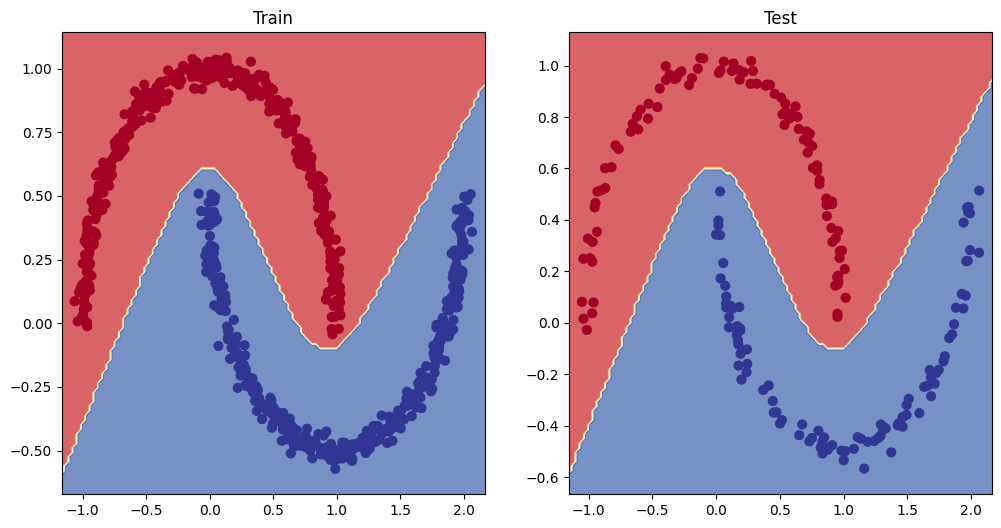

In [57]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)